<a href="https://colab.research.google.com/github/toobakhan64/BS-Project-2025/blob/main/Rough_code_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
os.listdir('/content/')

['.config',
 'Tooba_UBL_data.csv',
 'Tooba_SRVI_data.csv',
 '.ipynb_checkpoints',
 'Tooba_HBL_data.csv',
 'sample_data']

In [ ]:
import pandas as pd

# Load CSV files from Colab directory
hbl_df = pd.read_csv('/content/Tooba_HBL_data.csv')
ubl_df = pd.read_csv('/content/Tooba_UBL_data.csv')
srvi_df = pd.read_csv('/content/Tooba_SRVI_data.csv')

In [ ]:
companies = {
    "HBL": "/content/Tooba_HBL_data.csv",
    "UBL": "/content/Tooba_UBL_data.csv",
    "SRVI": "/content/Tooba_SRVI_data.csv"
}

In [ ]:
import pandas as pd

file_path = "/content/Tooba_HBL_data.csv"

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())  # Display first 5 rows
except FileNotFoundError:
    print("File not found. Please check the file path and upload again.")

File loaded successfully!
       Date        Open        High         Low       Close   Volume
0  1/1/2024  100.473636  105.613809  100.473636  104.933891  2877447
1  1/2/2024  105.967367  107.698893  104.253976  105.641007  4163065
2  1/3/2024  106.076153  108.070574  105.604740  106.692612  3264531
3  1/4/2024  106.157740  106.747003  105.251184  105.613808  1132175
4  1/5/2024  106.475038  106.964579  104.435286  106.438782  1060265


In [ ]:
import pandas as pd

file_path = "/content/Tooba_HBL_data.csv"  # Change for other files if needed
df = pd.read_csv(file_path)

print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

HBL - ARIMA MAE: 19.95, RMSE: 26.14


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

UBL - ARIMA MAE: 51.31, RMSE: 56.89


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SRVI - ARIMA MAE: 133.51, RMSE: 152.85


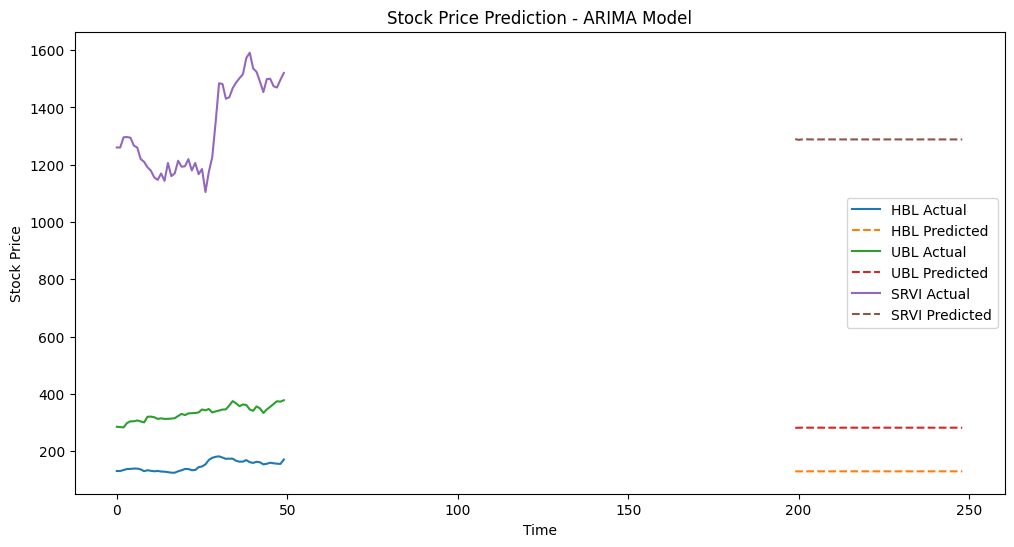

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to Train ARIMA Model
def train_arima(file_path, company_name):
    # Load Data
    data = pd.read_csv(file_path)
    data.dropna(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)  # Set Date as index for ARIMA

    # Selecting Multiple Features
    features = ['Open', 'High', 'Low', 'Close']
    data = data[features]

    # Train ARIMA on Closing Prices
    train_size = int(len(data) * 0.8)
    train, test = data['Close'][:train_size], data['Close'][train_size:]

    # Fit ARIMA Model
    model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q) → p=5, d=1, q=0
    fitted_model = model.fit()

    # Make Predictions
    predictions = fitted_model.forecast(steps=len(test))

    # Evaluate Model
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))

    print(f"{company_name} - ARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    return test.values, predictions, company_name

# File Paths
companies = {
    "HBL": "/content/Tooba_HBL_data.csv",
    "UBL": "/content/Tooba_UBL_data.csv",
    "SRVI": "/content/Tooba_SRVI_data.csv"
}

# Run ARIMA Model for Each Company
results = []
for company, file_path in companies.items():
    actual, predicted, name = train_arima(file_path, company)
    results.append((actual, predicted, name))

# Plot Predictions
plt.figure(figsize=(12, 6))
for actual, predicted, name in results:
    plt.plot(actual, label=f'{name} Actual', linestyle='solid')
    plt.plot(predicted, label=f'{name} Predicted', linestyle='dashed')

plt.legend()
plt.title('Stock Price Prediction - ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()



In [23]:
!pip install tensorflow numpy pandas matplotlib scikit-learn

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0397
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0117
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0085
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0051
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1073
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0076
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0017
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0013
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1026
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0105
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0029


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step


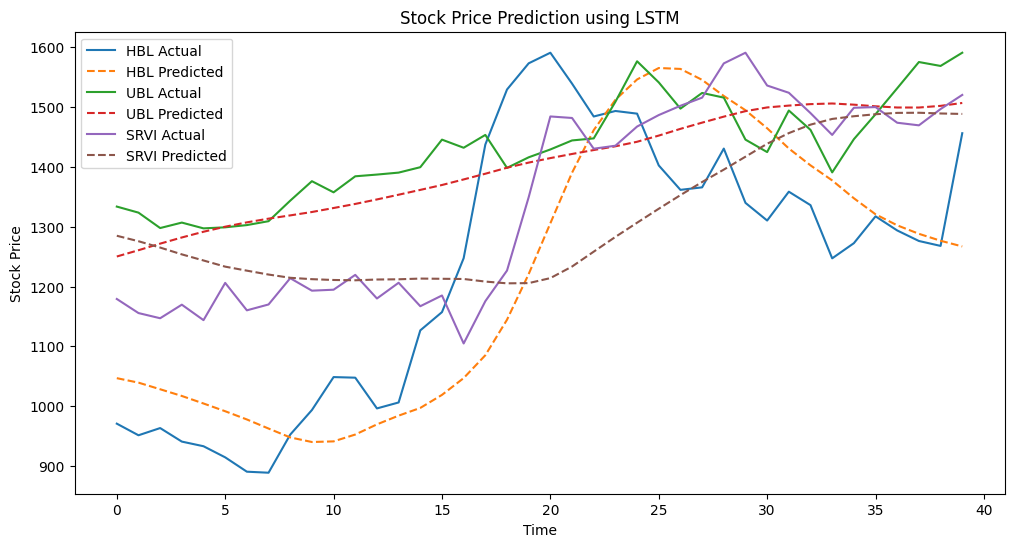

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# --- Function to Load and Prepare Data ---
def load_stock_data(file_path):
    data = pd.read_csv(file_path)
    data.dropna(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data[['Close']]

# --- Load Data ---
companies = {
    "HBL": "/content/Tooba_HBL_data.csv",
    "UBL": "/content/Tooba_UBL_data.csv",
    "SRVI": "/content/Tooba_SRVI_data.csv"
}

data_dict = {name: load_stock_data(path) for name, path in companies.items()}

# --- Normalize Data (Scaling to 0-1) ---
scaler = MinMaxScaler(feature_range=(0, 1))

for name in data_dict:
    data_dict[name]['Close'] = scaler.fit_transform(data_dict[name][['Close']])

# --- Create Sequences for LSTM ---
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Using last 50 days for prediction
train_size = 0.8  # 80% training data

lstm_results = {}

for name, data in data_dict.items():
    values = data['Close'].values
    X, y = create_sequences(values, seq_length)

    train_size_idx = int(len(X) * train_size)
    X_train, X_test = X[:train_size_idx], X[train_size_idx:]
    y_train, y_test = y[:train_size_idx], y[train_size_idx:]

    # --- Build LSTM Model ---
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # --- Train Model ---
    model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1)

    # --- Predict ---
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Convert back to original scale
    actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

    lstm_results[name] = (actual_values, predictions)

# --- Plot Predictions ---
plt.figure(figsize=(12, 6))
for name, (actual, predicted) in lstm_results.items():
    plt.plot(actual, label=f'{name} Actual', linestyle='solid')
    plt.plot(predicted, label=f'{name} Predicted', linestyle='dashed')

plt.legend()
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()


In [25]:
!pip install pandas numpy matplotlib seaborn


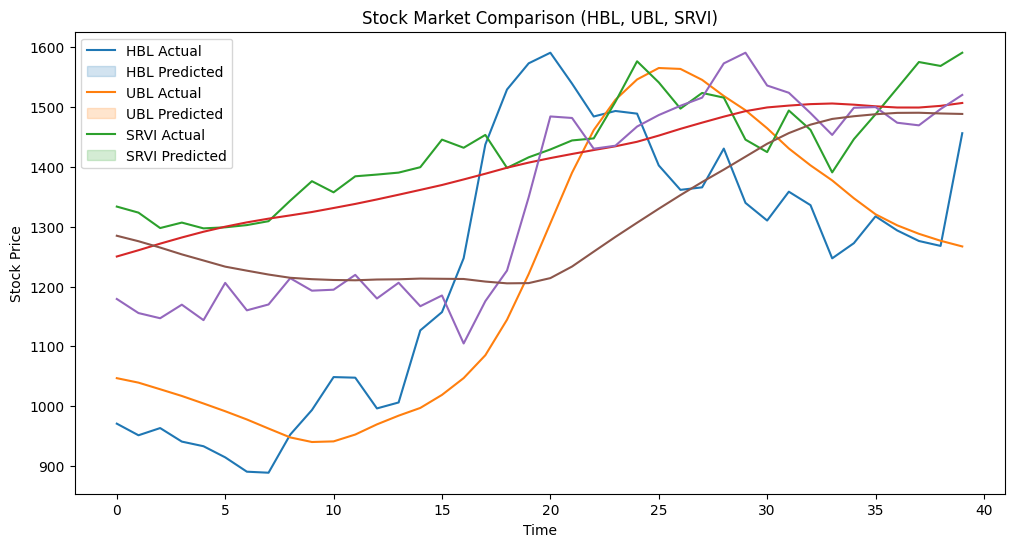

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Store Predictions and Actual Data ---
comparison_df = pd.DataFrame({
    "HBL_Actual": lstm_results["HBL"][0].flatten(),
    "HBL_Predicted": lstm_results["HBL"][1].flatten(),
    "UBL_Actual": lstm_results["UBL"][0].flatten(),
    "UBL_Predicted": lstm_results["UBL"][1].flatten(),
    "SRVI_Actual": lstm_results["SRVI"][0].flatten(),
    "SRVI_Predicted": lstm_results["SRVI"][1].flatten()
})

# --- Plot Comparison ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_df, dashes=False)
plt.title("Stock Market Comparison (HBL, UBL, SRVI)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(labels=["HBL Actual", "HBL Predicted", "UBL Actual", "UBL Predicted", "SRVI Actual", "SRVI Predicted"])
plt.show()
